C:\Users\shake\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


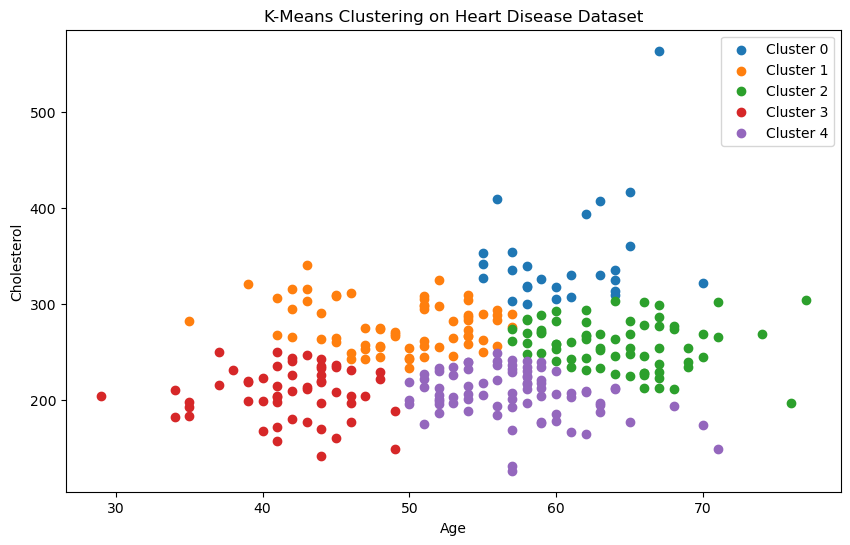

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_csv(url, names=columns, header=None)

df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)


df = df.apply(pd.to_numeric)
columns_needed = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'thal']
data = df[columns_needed]

features = ["age", "chol"]
X = df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data_scaled = scaler.fit_transform(data)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = df[df["cluster"] == cluster]
    plt.scatter(cluster_data["age"], cluster_data["chol"], label=f'Cluster {cluster}')

plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("K-Means Clustering on Heart Disease Dataset")
plt.legend()
plt.show()






C:\Users\shake\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\shake\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\shake\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\shake\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

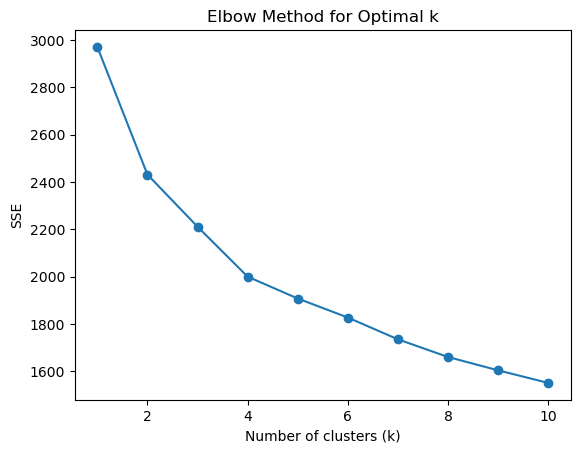

Optimal k: 4


C:\Users\shake\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
data1 = data.copy()
data1['Cluster'] = cluster
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)


plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()


knee_locator = KneeLocator(k_values, sse, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow
print(f'Optimal k: {optimal_k}')


kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
data1['Optimal_Cluster'] = kmeans_optimal.fit_predict(data_scaled)

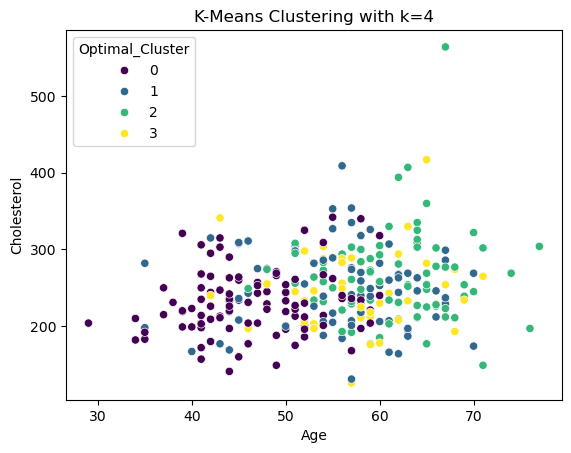

In [ ]:

sns.scatterplot(x=data['age'], y=data['chol'], hue=data1['Optimal_Cluster'], palette='viridis')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

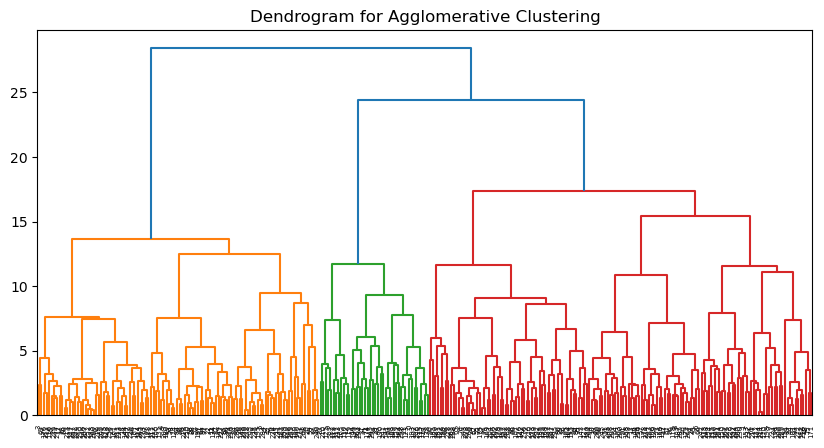

In [127]:
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

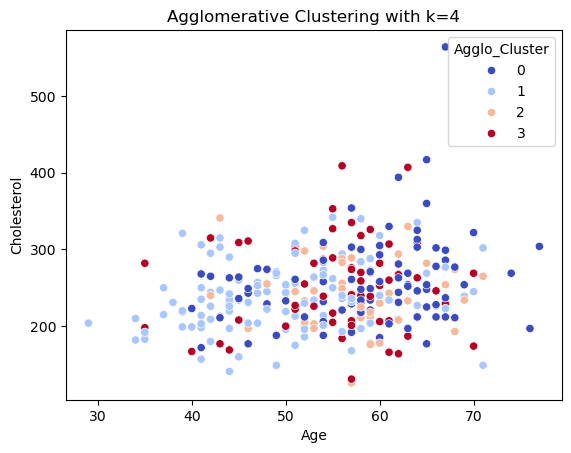

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
data1['Agglo_Cluster'] = agg_clustering.fit_predict(data_scaled)

sns.scatterplot(x=data['age'], y=data['chol'], hue=data['Agglo_Cluster'], palette='coolwarm')
plt.title(f'Agglomerative Clustering with k={optimal_k}')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


In [ ]:

silhouette_kmeans = silhouette_score(data_scaled, data1['Optimal_Cluster'])
silhouette_agglo = silhouette_score(data_scaled, data1['Agglo_Cluster'])

print(f'Silhouette Score for K-Means: {silhouette_kmeans}')
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo}')


if silhouette_kmeans > silhouette_agglo:
    print("K-Means clustering performs better for this dataset.")
else:
    print("Agglomerative clustering performs better for this dataset.")

Silhouette Score for K-Means: 0.15540629925214594
Silhouette Score for Agglomerative Clustering: 0.12442763739625855
K-Means clustering performs better for this dataset.
